# КДЗ «Сортировки»

In [370]:
import pandas as pd
import matplotlib.pyplot as plt

## Обязательная часть КДЗ

In [371]:
data = pd.read_csv("main_part.txt", sep=';', header=0)
data

,N,Insert Sort,Merge Sort
0,5,0.000500,0.001667
1,5,0.000417,0.001375
2,5,0.000333,0.001334
3,5,0.000375,0.001375
4,5,0.000250,0.001333
...,...,...,...
795,8000,64.397167,1.448667
796,8000,64.800792,1.445625
797,8000,63.299458,1.453709
798,8000,63.027542,1.464834


### Таблица усредненных значений (средние на наборе размера N)

In [372]:
mean = data.groupby(['N']).mean()
mean

,Insert Sort,Merge Sort
N,,
5,0.000318,0.001297
10,0.000795,0.002245
15,0.001448,0.004048
20,0.002732,0.005755
30,0.004478,0.008118
45,0.007970,0.011667
60,0.013421,0.016088
80,0.022880,0.022848
100,0.034522,0.029621


In [373]:
def plot(df):
    col0 = df.columns[0]
    mean = df.groupby([col0]).mean()
    
    plt.figure(figsize=(10,10))
    for col in df.columns[1:]:
        plt.scatter(df[col0], df[col], label=col + ' runtimes')
        plt.plot(mean.index, mean[col], label=col + ' average runtime')
    
    plt.xlabel(col0)
    plt.ylabel('Runtime, ms')
    plt.legend(loc='upper left')
    plt.show()

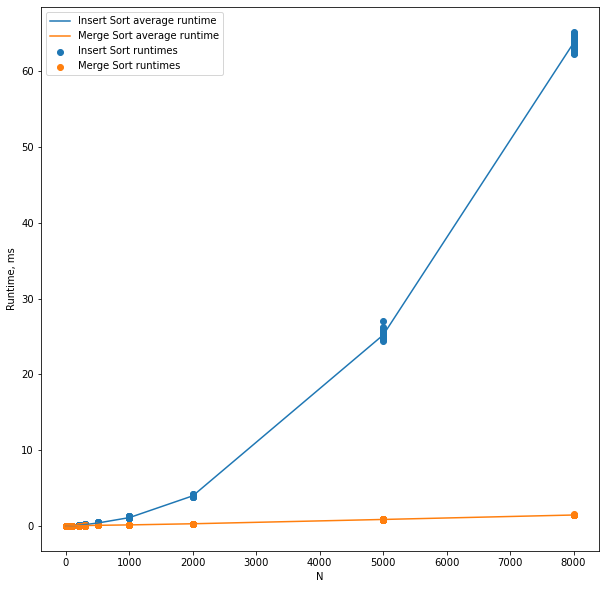

In [374]:
plot(data)

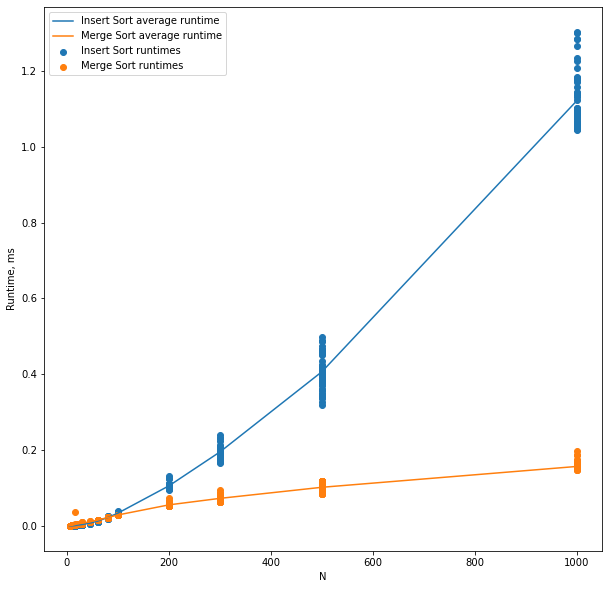

In [375]:
plot(data[data['N'] <= 1000])

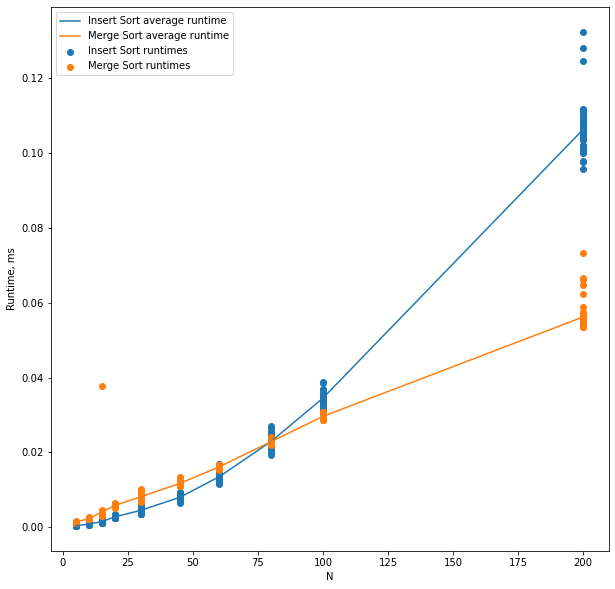

In [376]:
plot(data[data['N'] <= 200])

## Сравнение эффективных сортировок

In [377]:
data = pd.read_csv("efficient_comparison.txt", sep=';', header=0)
data

,N,Merge Sort,Quick Sort,Heap Sort,Quick Sort Modification,Sort with Skip List
0,60,0.016166,0.009542,0.035667,0.134458,0.147500
1,60,0.015417,0.009500,0.036292,0.144417,0.106417
2,60,0.023542,0.012541,0.040917,0.147708,0.108167
3,60,0.018084,0.010625,0.042250,0.167375,0.102459
4,60,0.018250,0.011875,0.043000,0.144667,0.105334
...,...,...,...,...,...,...
155,1000000,275.848166,184.150792,431.572333,1655.125791,789.999875
156,1000000,280.042542,181.349958,429.692333,1636.000083,868.354959
157,1000000,277.734083,180.606500,432.405041,1647.941750,797.383958
158,1000000,276.182708,180.182791,427.673708,1647.273541,787.276333


### Таблица усредненных значений (средние на наборе размера N)

In [378]:
mean = data.groupby(['N']).mean()
mean

,Merge Sort,Quick Sort,Heap Sort,Quick Sort Modification,Sort with Skip List
N,,,,,
60,0.017058,0.010508,0.040063,0.144363,0.104863
80,0.025088,0.018696,0.047246,0.207750,0.141383
100,0.030542,0.023188,0.053421,0.257004,0.141863
200,0.059338,0.045029,0.101237,0.476204,0.204467
300,0.082725,0.061546,0.136850,0.643504,0.255850
500,0.119225,0.088867,0.197617,0.927162,0.335717
1000,0.200387,0.147212,0.326471,1.519125,0.502508
2000,0.335308,0.239879,0.535933,2.443729,0.755400
5000,0.866412,0.608283,1.362854,6.007654,1.824321


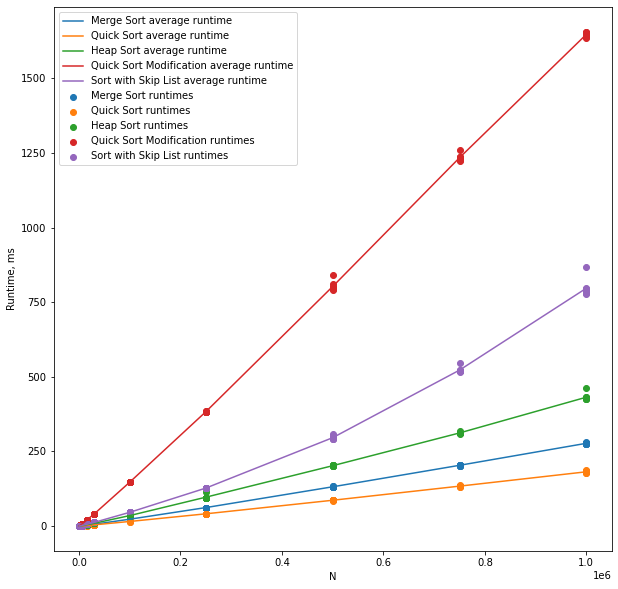

In [379]:
plot(data)

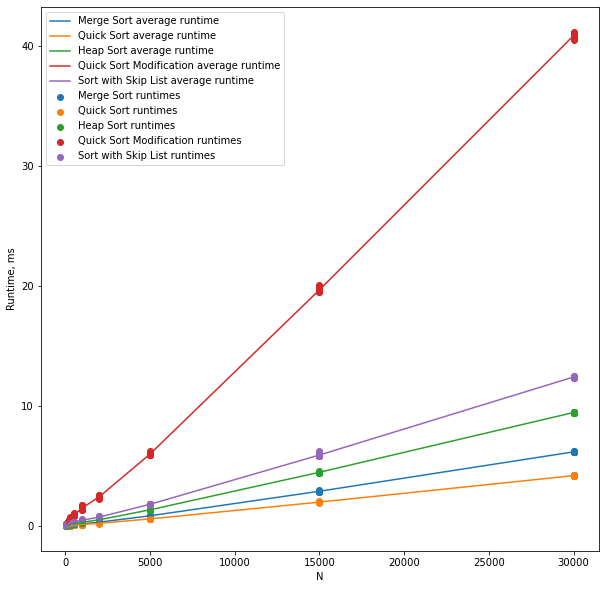

In [380]:
plot(data[data['N'] <= 30000])

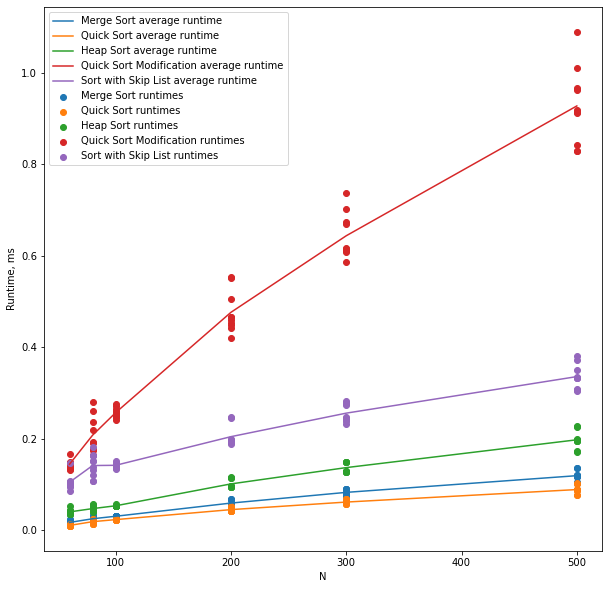

In [381]:
plot(data[data['N'] <= 500])

## Сравнение сортировки вставками и сортировки вставками с бинпоиском

In [382]:
data = pd.read_csv("insert_comparison.txt", sep=';', header=0)
data

,N,M,Insert Sort,Insert Sort with Binary Search
0,10,1,0.008334,0.006583
1,10,1,0.006708,0.006541
2,10,1,0.006709,0.006583
3,10,1,0.006375,0.006667
4,10,1,0.006541,0.006750
...,...,...,...,...
1095,2000,1000,71.896959,31.183000
1096,2000,1000,73.195958,31.730208
1097,2000,1000,73.268959,31.648250
1098,2000,1000,73.348708,31.771125


### Таблица усредненных значений (средние на наборе размера N строк длины M)

In [383]:
mean = data.groupby(['N', 'M']).mean()
mean

Insert Sort  Insert Sort with Binary Search
N    M                                                
10   1        0.006696                        0.006633
     2        0.006921                        0.006663
     5        0.007400                        0.006759
     10       0.008879                        0.008154
     50       0.009738                        0.009000
...                ...                             ...
2000 100     48.383454                        8.373167
     200     52.412512                       11.177992
     300     55.442925                       16.069592
     500     60.658742                       20.885071
     1000    72.639792                       31.478004

[110 rows x 2 columns]

### Относительная таблица

In [384]:
col1, col2 = mean.columns
rel = mean[col2].divide(mean[col1])
rel.unstack()

M,1,2,5,10,50,100,200,300,500,1000
N,,,,,,,,,,
10,0.990636,0.962664,0.913311,0.918338,0.924242,0.880291,0.925964,0.727730,0.892305,0.954717
20,0.839742,0.804271,0.826024,0.877595,0.866256,0.784581,0.784297,0.864772,0.814775,0.819316
40,0.650246,0.591849,0.607738,0.564928,0.647394,0.617660,0.590817,0.671636,0.707086,0.686198
60,0.514840,0.469037,0.476556,0.477778,0.545277,0.506785,0.540955,0.575788,0.600329,0.602328
80,0.408190,0.399515,0.408145,0.400652,0.474724,0.476848,0.470982,0.513651,0.539624,0.560952
100,0.378589,0.361454,0.364347,0.362701,0.421231,0.422423,0.426702,0.471228,0.510814,0.527356
200,0.252982,0.242668,0.244956,0.245016,0.320894,0.302415,0.323365,0.377775,0.407931,0.472349
500,0.157312,0.158385,0.157305,0.159044,0.240231,0.224663,0.245350,0.303489,0.367669,0.452853
750,0.135134,0.136177,0.135820,0.134807,0.221689,0.196469,0.228246,0.297215,0.368734,0.452531
